# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("3045.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5119 entries, 2002-08-27 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5119 non-null   float64
 1   High                       5119 non-null   float64
 2   Low                        5119 non-null   float64
 3   Close                      5119 non-null   float64
 4   Volume                     5119 non-null   int64  
 5   Dividends                  5119 non-null   float64
 6   Stock Splits               5119 non-null   float64
 7   volume_adi                 5119 non-null   float64
 8   volume_obv                 5119 non-null   int64  
 9   volume_cmf                 5100 non-null   float64
 10  volume_fi                  5106 non-null   float64
 11  volume_em                  5078 non-null   float64
 12  volume_sma_em              4837 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                 Open        High         Low       Close   
Date                                                                        
2002-08-27 00:00:00+08:00   11.280211   11.517065   11.280211   11.339423  \
2002-08-28 00:00:00+08:00   11.339423   11.457852   11.309817   11.339423   
2002-08-29 00:00:00+08:00   11.369035   11.487461   11.280213   11.280213   
2002-08-30 00:00:00+08:00   11.339424   11.339424   11.250606   11.250606   
2002-09-02 00:00:00+08:00   11.250606   11.250606   11.102570   11.250606   
...                               ...         ...         ...         ...   
2023-05-29 00:00:00+08:00  103.000000  103.500000  102.000000  103.000000   
2023-05-30 00:00:00+08:00  103.000000  103.500000  102.000000  103.500000   
2023-05-31 00:00:00+08:00  103.500000  103.500000  102.500000  103.500000   
2023-06-01 00:00:00+08:00  103.500000  103.500000  102.500000  103.000000   
2023-06-02 00:00:00+08:00  103.000000  104.500000  103.000000  104.000000   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5119 entries, 2002-08-27 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5119 non-null   float64
 1   High             5119 non-null   float64
 2   Low              5119 non-null   float64
 3   Close            5119 non-null   float64
 4   Volume           5119 non-null   int64  
 5   trend_macd_diff  5086 non-null   float64
 6   trend_ema_fast   5108 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 319.9 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  96.978704  97.458797  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  96.018517  96.498610   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  95.154351  95.730461   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  95.730459  95.730459   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  95.538422  95.538422   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  96.599998  96.900002   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  97.199997  97.199997   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  96.599998  97.500000   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  97.400002  97.699997   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  97.800003  97.900002   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,92.199997,92.199997,91.300003,91.800003,3243489,-0.174574,93.201587,11.627919,41.171861
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,92.000000,92.400002,91.699997,92.000000,2207497,-0.183954,93.016727,16.279016,42.198415
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,92.699997,93.599998,92.599998,93.300003,2553582,-0.093416,93.060308,46.511677,48.490441
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,93.400002,94.099998,93.199997,94.099998,3412368,0.023306,93.220260,65.116242,51.956331
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,93.500000,93.699997,92.699997,93.000000,3160261,0.029014,93.186374,39.534855,47.248664
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,94.000000,94.400002,93.099998,94.000000,2325738,0.098792,93.311547,62.790694,51.546820
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,94.000000,95.500000,93.900002,95.500000,10519530,0.236755,93.648232,97.674452,57.182495
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,95.400002,95.400002,93.800003,94.099998,3146944,0.224611,93.717735,65.116242,51.197123
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,94.099998,94.599998,93.500000,94.599998,1784239,0.239761,93.853468,78.571377,53.085803


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 30, 'C': 0.1, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=0.1)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[98.68541281 98.60231115 97.92302499 97.56657794 97.67401701 97.98852545
 97.89120747 97.60164724 98.92686607 97.88615018 97.45686766 97.53318778
 97.74059136 98.17522429 97.56725817 97.46683868 97.43104756 98.11618091
 97.70689943 97.5568646  98.64022945 97.47551589 97.84934519 97.42056339
 97.3175325  97.65902946 97.32169758 97.32048923 97.48019006 97.45641656
 97.30830956 97.43224964 97.42306368 97.36092228 97.34122902 98.26769932
 97.67679419 98.53484163 98.41382347 97.59964232 97.52560273 97.74704318
 99.03732927 98.88647181 97.59090099 97.68370068 97.70783628 97.74488332
 97.65146801 97.37556746 97.49396239 97.55062508 97.76673929 97.51453775
 97.52031582 97.58847368 97.43512445 97.39282419 97.42721226 97.73931351
 97.43118866 98.54450015]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5055 2023-03-01 00:00:00+08:00        98.685413
5056 2023-03-02 00:00:00+08:00        98.602311
5057 2023-03-03 00:00:00+08:00        97.923025
5058 2023-03-06 00:00:00+08:00        97.566578
5059 2023-03-07 00:00:00+08:00        97.674017
...                        ...              ...
5112 2023-05-25 00:00:00+08:00        97.392824
5113 2023-05-26 00:00:00+08:00        97.427212
5114 2023-05-29 00:00:00+08:00        97.739314
5115 2023-05-30 00:00:00+08:00        97.431189
5116 2023-05-31 00:00:00+08:00        98.544500

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-17 00:00:00+08:00
最低值： 97.30830956208128
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 99.03732926746221


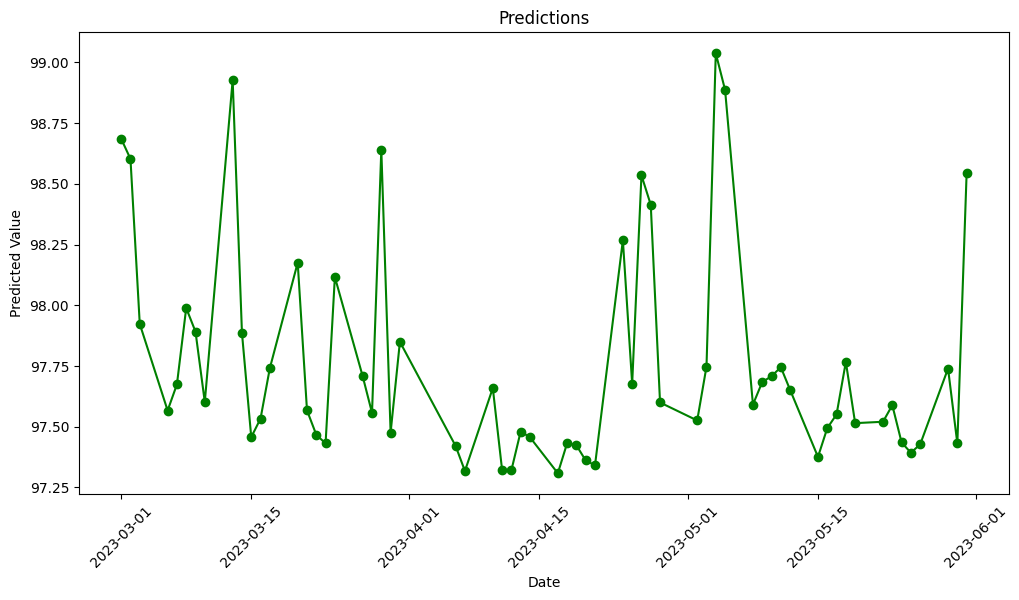

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

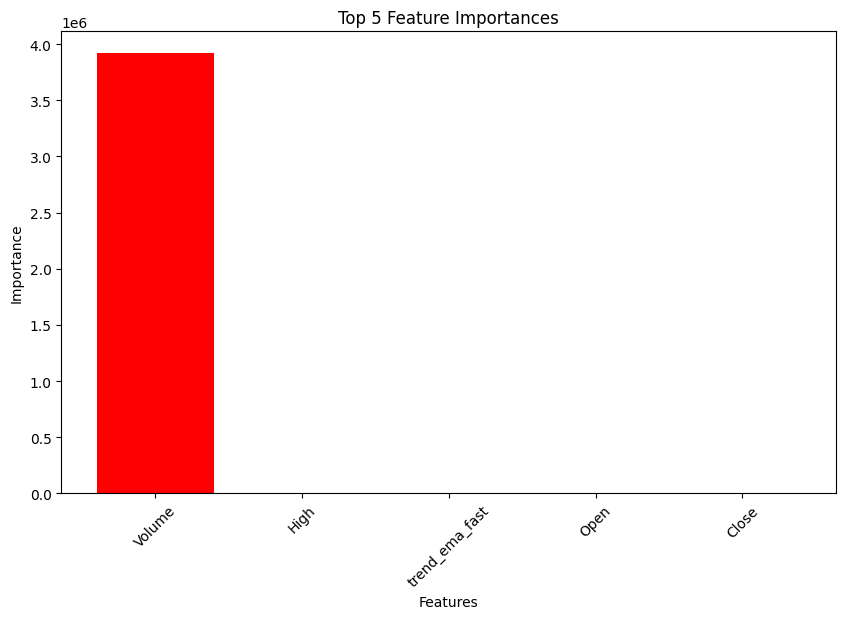

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 150, 'max_depth': 3, 'min_samples_leaf': 1}
最佳相对误差: 0.010907106927676585 %


RandomForestRegressor(max_depth=3, n_estimators=150, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[94.30300164 92.51155972 92.51155972 92.51155972 92.71741282 94.52472665
 92.57368165 94.54112489 95.32828848 94.55456066 94.64414797 94.56602668
 93.37722985 95.25374672 95.19953328 95.25374672 96.06960582 94.7876884
 95.25374672 94.64414797 94.55456066 94.55259091 93.6151226  94.56602668
 94.67565836 94.67565836 94.67565836 94.67565836 94.56602668 94.58949885
 94.64414797 95.25374672 96.06960582 96.06960582 96.14167747 97.79918021
 97.83437279 95.34195991 94.64414797 94.90089774 96.06960582 94.90089774
 96.72054651 94.64414797 94.7876884  94.73134184 94.90089774 94.69148138
 95.544113   95.25374672 95.544113   96.06960582 96.64543042 96.5055076
 96.08327724 96.15534889 96.58236328 96.74807567 96.73389618 97.14805933
 97.70790883 96.60327239]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5055 2023-03-01 00:00:00+08:00       94.303002
5056 2023-03-02 00:00:00+08:00       92.511560
5057 2023-03-03 00:00:00+08:00       92.511560
5058 2023-03-06 00:00:00+08:00       92.511560
5059 2023-03-07 00:00:00+08:00       92.717413
...                        ...             ...
5112 2023-05-25 00:00:00+08:00       96.748076
5113 2023-05-26 00:00:00+08:00       96.733896
5114 2023-05-29 00:00:00+08:00       97.148059
5115 2023-05-30 00:00:00+08:00       97.707909
5116 2023-05-31 00:00:00+08:00       96.603272

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-02 00:00:00+08:00
最低值： 92.51155971939902
最高值日期： 2023-04-25 00:00:00+08:00
最高值： 97.8343727931634


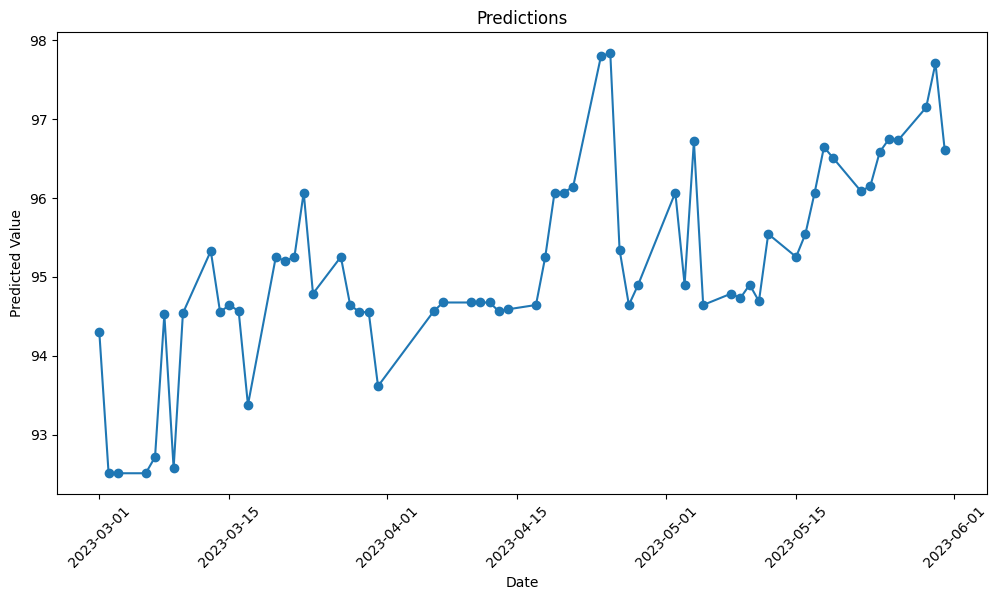

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



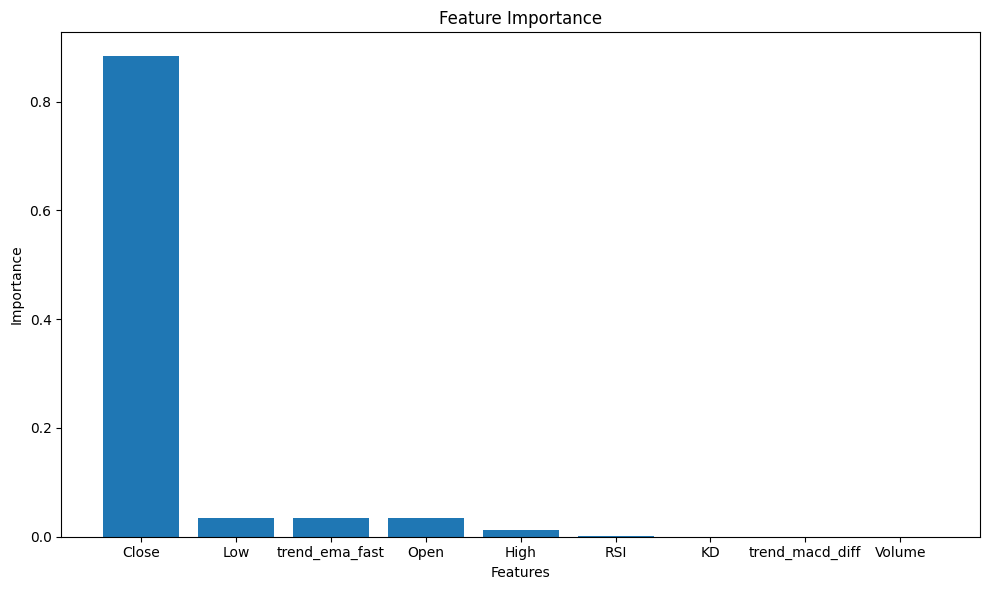

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 62.423252 62.423252 61.2499   61.2499   61.2499   61.2499   61.2499
 61.301323 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.2499   61.2499   61.2499   61.2499   61.2499   61.2499
 61.2499   61.353485 61.301323 61.572124 61.872356 61.2499  ]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5055 2023-03-01 00:00:00+08:00       61.249901
5056 2023-03-02 00:00:00+08:00       61.249901
5057 2023-03-03 00:00:00+08:00       61.249901
5058 2023-03-06 00:00:00+08:00       61.249901
5059 2023-03-07 00:00:00+08:00       61.249901
...                        ...             ...
5112 2023-05-25 00:00:00+08:00       61.353485
5113 2023-05-26 00:00:00+08:00       61.301323
5114 2023-05-29 00:00:00+08:00       61.572124
5115 2023-05-30 00:00:00+08:00       61.872356
5116 2023-05-31 00:00:00+08:00       61.249901

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-01 00:00:00+08:00
最低值： 61.2499
最高值日期： 2023-04-24 00:00:00+08:00
最高值： 62.423252


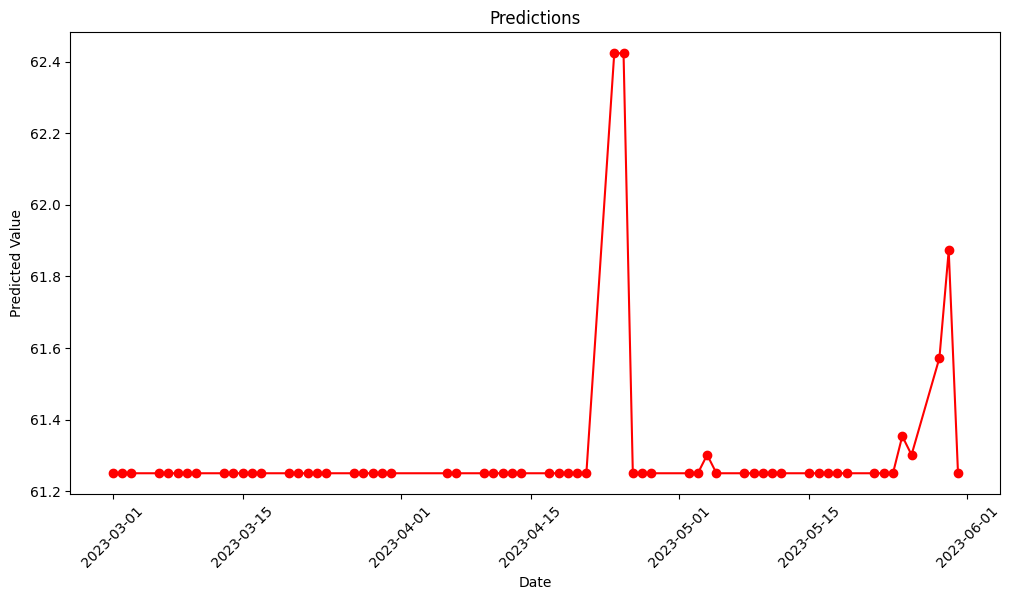

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



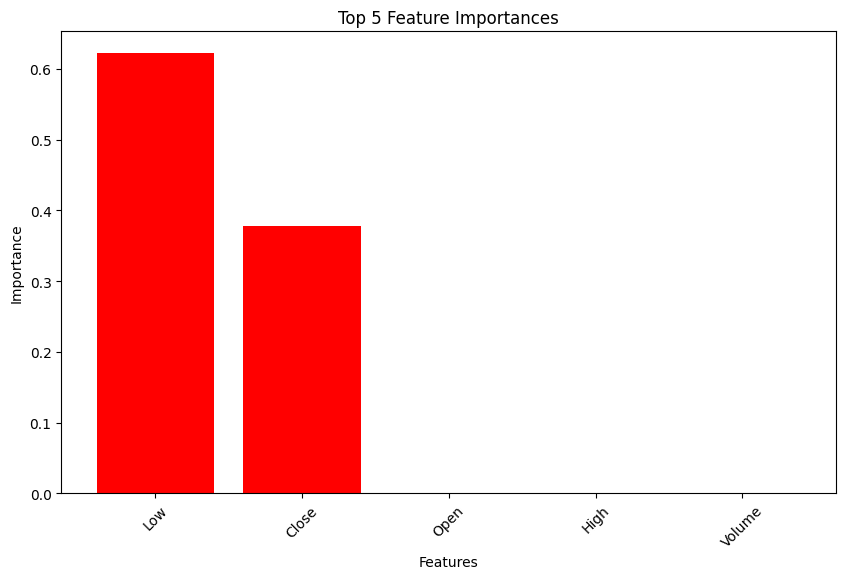

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


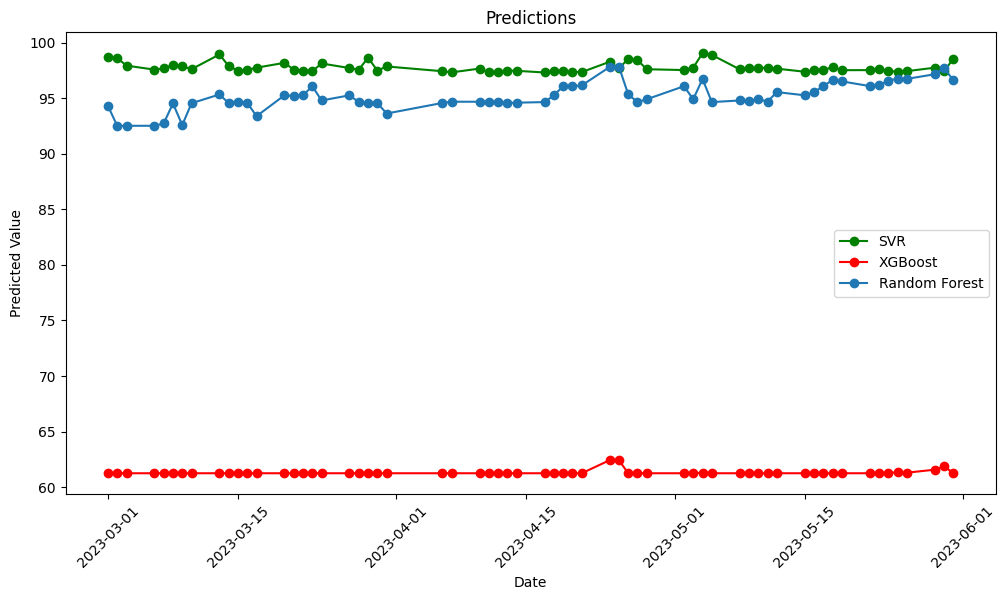

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
